In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [313]:
coffee_data = pd.read_csv("data/merged_data_cleaned.csv")

In [314]:
coffee_data

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [315]:
observations, features = coffee_data.shape

print(f"Observations: {observations}")
print(f"Features: {features}")

Observations: 1339
Features: 44


In [316]:
data_types = coffee_data.dtypes.reset_index() # Convert to DataFrame
data_types = data_types.rename(columns={"index": "feature", 0: "data_type"}) # Rename columns

In [317]:
data_types

,feature,data_type
0,Unnamed: 0,int64
1,Species,object
2,Owner,object
3,Country.of.Origin,object
4,Farm.Name,object
5,Lot.Number,object
6,Mill,object
7,ICO.Number,object
8,Company,object
9,Altitude,object


In [318]:
data_types.data_type.value_counts()

data_type
object     24
float64    16
int64       4
Name: count, dtype: int64

In [319]:
numerical_features = data_types[data_types.data_type != "object"]
numerical_features

,feature,data_type
0,Unnamed: 0,int64
12,Number.of.Bags,int64
20,Aroma,float64
21,Flavor,float64
22,Aftertaste,float64
23,Acidity,float64
24,Body,float64
25,Balance,float64
26,Uniformity,float64
27,Clean.Cup,float64


In [320]:
categorical_features = data_types[data_types.data_type == "object"]
categorical_features

,feature,data_type
1,Species,object
2,Owner,object
3,Country.of.Origin,object
4,Farm.Name,object
5,Lot.Number,object
6,Mill,object
7,ICO.Number,object
8,Company,object
9,Altitude,object
10,Region,object


*Altitude* column has both ranges and just numerical values so it could be divided in two columns. For Example: min_altitude and max_altitude. Both new columns should be numerical. And as we can see, these columns already exist with the names *altitude_low_meters* and *altitude_high_meters*. Therefore *Altitude* might be removed. Ranges and numbers ending with *m*, *meters* and similary are the reason the column is marked as *object* type. There is one more column related to altitude - *altitude_mean_meters* and it can be dropped since it can be calculated.

In [321]:
print(coffee_data["Altitude"])

0           1950-2200
1           1950-2200
2       1600 - 1800 m
3           1800-2200
4           1950-2200
            ...      
1334              NaN
1335               40
1336       795 meters
1337              NaN
1338              NaN
Name: Altitude, Length: 1339, dtype: object


We have similar case with the column *Bag.Weight*

In [322]:
print(coffee_data["Bag.Weight"])

0       60 kg
1       60 kg
2           1
3       60 kg
4       60 kg
        ...  
1334     2 kg
1335     2 kg
1336     1 kg
1337    5 lbs
1338    5 lbs
Name: Bag.Weight, Length: 1339, dtype: object


### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [323]:
def to_snake_case(col_name):
    col_name = col_name.strip()
    col_name = col_name.lower()
    col_name = re.sub(r"[^\w\s]", "_", col_name) # replace non-alphanumeric characters with underscores
    col_name = re.sub(r"\s+", "_", col_name) # regex is used instead of replace to handle multiple spaces
    col_name = re.sub(r"_+", "_", col_name)  # replace multiple underscores with a single underscore
    col_name = col_name.rstrip("_")

    return col_name

In [324]:
coffee_data.columns = [to_snake_case(c) for c in coffee_data.columns]

In [325]:
#Change first column name
coffee_data = coffee_data.rename(columns={"unnamed_0": "id"})

In [326]:
coffee_data.columns

Index(['id', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region',
       'producer', 'number_of_bags', 'bag_weight', 'in_country_partner',
       'harvest_year', 'grading_date', 'owner_1', 'variety',
       'processing_method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points',
       'total_cup_points', 'moisture', 'category_one_defects', 'quakers',
       'color', 'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

In [327]:
coffee_data.bag_weight

0       60 kg
1       60 kg
2           1
3       60 kg
4       60 kg
        ...  
1334     2 kg
1335     2 kg
1336     1 kg
1337    5 lbs
1338    5 lbs
Name: bag_weight, Length: 1339, dtype: object

In [328]:
def get_unit(x):
    if pd.isna(x):
        return "missing"
    
    x_str = str(x).strip()
    match = re.search(r"([a-zA-Z,]+)$", x_str)

    return match.group(1) if match else "number_only"

In [329]:
units = coffee_data.bag_weight.apply(get_unit)
unit_counts = units.value_counts().to_dict()
print(unit_counts)

{'kg': 1196, 'lbs': 114, 'number_only': 27, 'kg,lbs': 2}


As we can see, there are four types of weight values. Let's (try to) use only one - kg. The easiest thing to do is convert lbs to kg.

Let's begin by renaming column *bag_weight* to *bag_weight_kg*

In [330]:
coffee_data = coffee_data.rename(columns={"bag_weight": "bag_weight_kg"})

In [331]:
# remove all rows where bag_weight_kg constains "kg,lbs" or only a number without unit
coffee_data = coffee_data[
    ~coffee_data.bag_weight_kg.str.contains(r"kg,lbs$", na=False) & # removes "kg,lbs" unit
    coffee_data.bag_weight_kg.str.contains(r"[a-zA-Z]$", na=False) # removes only number without unit
]

In [332]:
def lbs_to_kg(x):
    x_str = str(x).strip()
    
    # number extraction
    match = re.search(r"(\d+)", x_str)
    value = float(match.group(1))

    # check unit and convert if necessary
    if "lbs" in x_str.lower():
        return round(value * 0.453592, 2) # lbs -> kg
    else:
        return value

In [333]:
coffee_data.bag_weight_kg = coffee_data.bag_weight_kg.apply(lbs_to_kg)

In [334]:
coffee_data = coffee_data[
    coffee_data.bag_weight_kg != 0
]

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

In [335]:
def convert_year(value):
    value = str(value).strip()
    
    # Year range pattern
    match_range = re.search(r"(\d{4})\s*[-/]\s*(\d{4})", value)
    if match_range:
        return int(match_range.group(1))

    # Standalone 4-digit numbers
    all_years = re.findall(r"(?<!\d)\d{4}(?!\d)", value)
    if all_years:
        return int(all_years[-1])

    # Trailing digits fallback
    match_end = re.search(r"(\d{2,4})$", value)
    if match_end:
        year_suffix = match_end.group(1)
        if len(year_suffix) == 4:
            return int(year_suffix)
        elif len(year_suffix) == 2:
            return 2000 + int(year_suffix)

    # Return None for text-only values
    return None

In [336]:
coffee_data.harvest_year = coffee_data.harvest_year.apply(convert_year)
coffee_data = coffee_data.dropna(subset=["harvest_year"])
coffee_data.harvest_year = coffee_data.harvest_year.astype(int)

In [337]:
coffee_data.harvest_year.value_counts()

harvest_year
2012    354
2014    252
2013    210
2015    157
2016    130
2017     89
2011     36
2010     26
2009      6
2018      1
Name: count, dtype: int64

In [338]:
print(coffee_data.expiration)
print(coffee_data.grading_date)

0           April 3rd, 2016
1           April 3rd, 2016
3          March 25th, 2016
4           April 3rd, 2016
5       September 3rd, 2014
               ...         
1334     January 18th, 2017
1335     January 18th, 2017
1336    December 23rd, 2015
1337      August 25th, 2015
1338      August 25th, 2015
Name: expiration, Length: 1261, dtype: object
0           April 4th, 2015
1           April 4th, 2015
3          March 26th, 2015
4           April 4th, 2015
5       September 3rd, 2013
               ...         
1334     January 19th, 2016
1335     January 19th, 2016
1336    December 23rd, 2014
1337      August 25th, 2014
1338      August 25th, 2014
Name: grading_date, Length: 1261, dtype: object


In [339]:
coffee_data.expiration = pd.to_datetime(coffee_data.expiration, format="mixed")
coffee_data.grading_date = pd.to_datetime(coffee_data.grading_date, format="mixed")

In [340]:
print(coffee_data.expiration)
print(coffee_data.grading_date)

0      2016-04-03
1      2016-04-03
3      2016-03-25
4      2016-04-03
5      2014-09-03
          ...    
1334   2017-01-18
1335   2017-01-18
1336   2015-12-23
1337   2015-08-25
1338   2015-08-25
Name: expiration, Length: 1261, dtype: datetime64[ns]
0      2015-04-04
1      2015-04-04
3      2015-03-26
4      2015-04-04
5      2013-09-03
          ...    
1334   2016-01-19
1335   2016-01-19
1336   2014-12-23
1337   2014-08-25
1338   2014-08-25
Name: grading_date, Length: 1261, dtype: datetime64[ns]


### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [341]:
coffee_data[coffee_data.country_of_origin.isna()]

,id,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters


In my case, there aren't any coffees with unknown country. There was one but when I cleared the rows with missing *harvest_year* it got deleted. Should it have remained, I'd probably have deleted it anyways.

### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In [342]:
coffee_data.owner.value_counts()

owner
juan luis alvarado romero            153
exportadora de cafe condor s.a        54
racafe & cia s.c.a                    51
ipanema coffees                       50
cqi taiwan icp cqi台灣合作夥伴              47
                                    ... 
kasozi coffee farmers association      1
nitubaasa ltd                          1
mannya coffee project                  1
yidnekachew dabessa                    1
james moore                            1
Name: count, Length: 306, dtype: int64

In [343]:
coffee_data.owner_1.value_counts()

owner_1
Juan Luis Alvarado Romero            153
Exportadora de Cafe Condor S.A        54
Racafe & Cia S.C.A                    51
Ipanema Coffees                       50
CQI Taiwan ICP CQI台灣合作夥伴              46
                                    ... 
Kasozi Coffee Farmers Association      1
Nitubaasa Ltd                          1
Mannya coffee project                  1
Yidnekachew Dabessa                    1
James Moore                            1
Name: count, Length: 309, dtype: int64

In [344]:
diff_owners = coffee_data[coffee_data.owner.str.lower() != coffee_data.owner_1.str.lower()]
diff_owners[["owner", "owner_1"]]

,owner,owner_1
219,"ceca, s.a.","CECA,S.A."
364,NaN,NaN
459,NaN,NaN
602,NaN,NaN
848,NaN,NaN
882,NaN,NaN
919,"lin, che-hao krude 林哲豪","Lin, Che-Hao Krude 林哲豪\n"
975,NaN,NaN
1044,NaN,NaN
1083,cqi taiwan icp cqi台灣合作夥伴,CQI Taiwan ICP CQI台灣合作夥伴\n


We can safely assume that semantically both columns are identical. The only difference is in the casing, and `lower()` function does not work because of NaN values, punctuation, and CJK symbols. Therefore, we can safely drop either one of the tables. I choose to drop the *owner* and rename *owner_1* to *owner*. *owner_1* contains the original names and we can always convert them to lower if needed.

In [345]:
coffee_data.drop(columns=["owner"], inplace=True)
coffee_data.rename(columns={"owner_1": "owner"}, inplace=True)

In [346]:
same_as_producer = coffee_data[coffee_data.owner.str.lower() == coffee_data.producer.str.lower()]
same_as_producer[["owner", "producer"]]

,owner,producer
0,metad plc,METAD PLC
1,metad plc,METAD PLC
4,metad plc,METAD PLC
9,Diamond Enterprise Plc,Diamond Enterprise Plc
22,ROBERTO LICONA FRANCO,ROBERTO LICONA FRANCO
...,...,...
1314,UGACOF,UGACOF
1315,Katuka Development Trust Ltd,Katuka Development Trust Ltd
1324,Kasozi Coffee Farmers Association,Kasozi coffee farmers Association
1328,Kawacom Uganda LTD,Kawacom uganda ltd


There are some owners that have the same name as the producer so we can assume that some owners also produce.

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [347]:
print(coffee_data.color.value_counts())
print(coffee_data.country_of_origin.value_counts())

color
Green           860
Bluish-Green    114
Blue-Green       83
Name: count, dtype: int64
country_of_origin
Mexico                          233
Guatemala                       175
Colombia                        173
Brazil                          127
Taiwan                           75
Honduras                         53
United States (Hawaii)           52
Costa Rica                       49
Tanzania, United Republic Of     40
Uganda                           36
Ethiopia                         30
Thailand                         27
Kenya                            23
Nicaragua                        21
El Salvador                      20
Indonesia                        19
China                            16
India                            14
Malawi                           11
United States                    10
Peru                              9
Vietnam                           8
Myanmar                           8
Haiti                             6
Philippines               

In [348]:
pd.crosstab(
    coffee_data.country_of_origin, 
    coffee_data.color, 
    dropna=False
)

color,Blue-Green,Bluish-Green,Green,NaN
country_of_origin,,,,
Brazil,14,12,89,12
Burundi,0,0,1,1
China,0,0,16,0
Colombia,8,8,117,40
Costa Rica,9,9,28,3
Cote d?Ivoire,0,1,0,0
Ecuador,2,1,0,0
El Salvador,2,2,9,7
Ethiopia,0,2,15,13


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

In [349]:
# get ratings columns
ratings = coffee_data.loc[:, 'aroma':'moisture']

In [350]:
print(ratings.describe())

             aroma       flavor   aftertaste      acidity         body  \
count  1261.000000  1261.000000  1261.000000  1261.000000  1261.000000   
mean      7.564774     7.514544     7.392006     7.527431     7.507581   
std       0.379493     0.398619     0.404584     0.380351     0.370952   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       7.420000     7.330000     7.250000     7.330000     7.330000   
50%       7.580000     7.500000     7.420000     7.500000     7.500000   
75%       7.750000     7.750000     7.580000     7.750000     7.670000   
max       8.750000     8.830000     8.670000     8.750000     8.580000   

           balance   uniformity    clean_cup    sweetness  cupper_points  \
count  1261.000000  1261.000000  1261.000000  1261.000000    1261.000000   
mean      7.505971     9.839088     9.833394     9.854726       7.490024   
std       0.409787     0.561806     0.783437     0.631237       0.472184   
min       0.000000     0.0000

In [351]:
individual_scores = ratings.drop(columns=['total_cup_points']) # drop total_cup_points column
calculated_total = individual_scores.sum(axis=1) # sum individual scores
difference = (calculated_total - ratings.total_cup_points).abs() # absolute difference

In [352]:
print(f"Mean difference: {difference.mean():.4f}")

comparison = pd.DataFrame({
    "calculated_total": calculated_total,
    "total_cup_points": ratings.total_cup_points,
    "difference": difference
})

comparison

Mean difference: 0.0915


,calculated_total,total_cup_points,difference
0,90.71,90.58,0.13
1,90.04,89.92,0.12
3,89.12,89.00,0.12
4,88.95,88.83,0.12
5,88.94,88.83,0.11
...,...,...,...
1334,78.73,78.75,0.02
1335,78.09,78.08,0.01
1336,77.17,77.17,0.00
1337,75.18,75.08,0.10


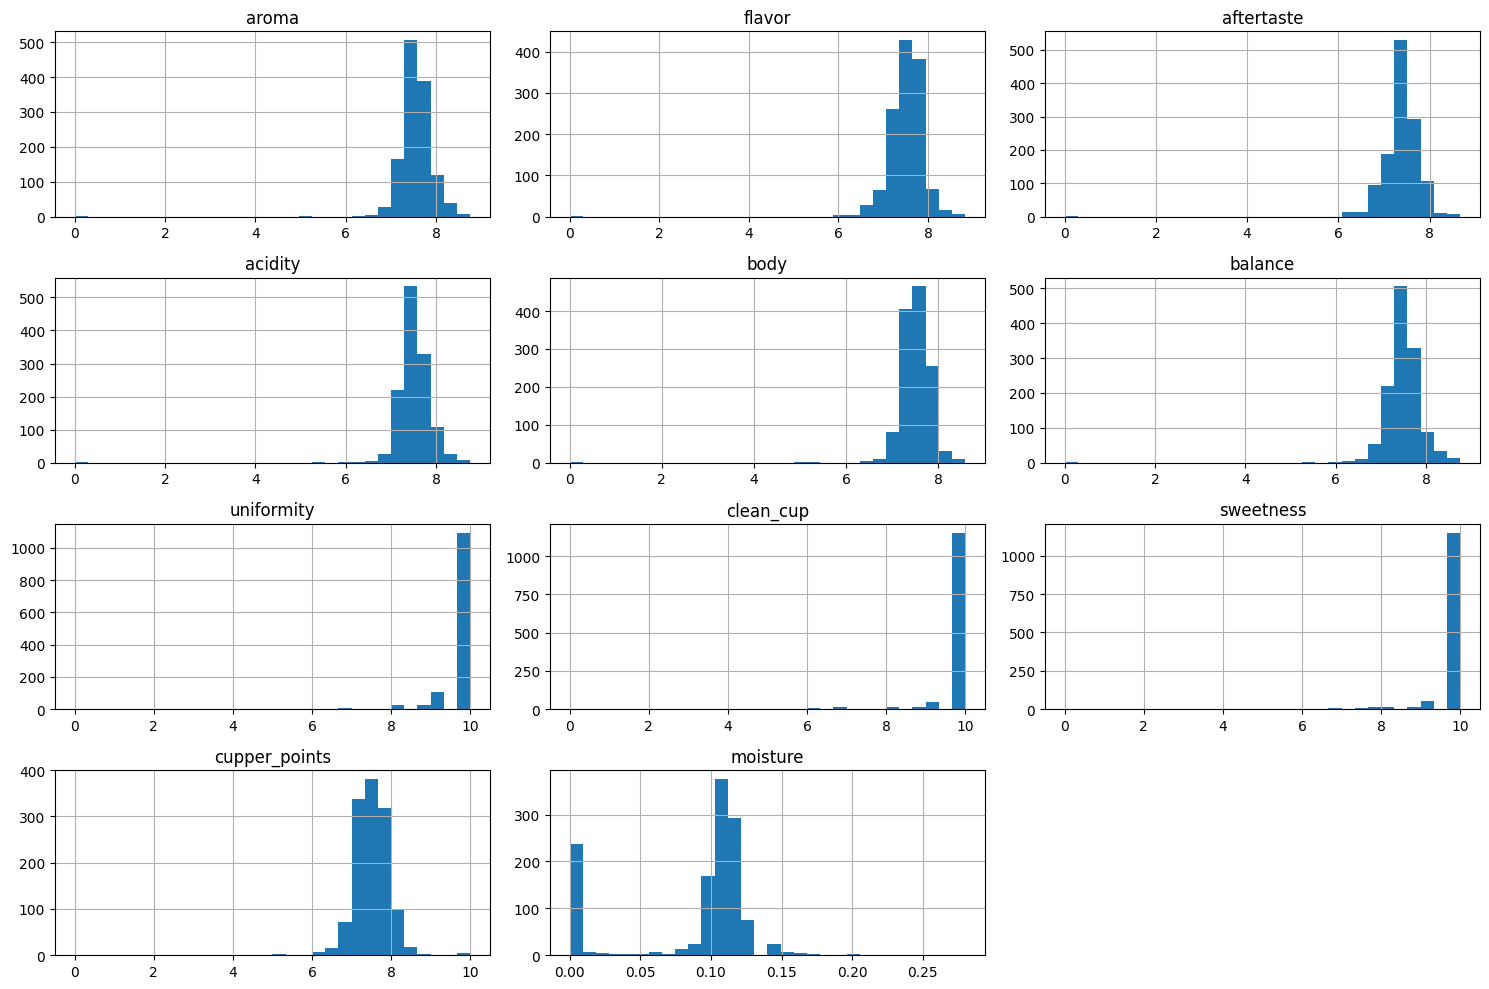

In [353]:
individual_scores.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

The following features show a normal distribution: *aroma*, *flavor*, *aftertaste*, *acidity*, *body*, *balance* and *cupper_points*. All of them are centered around 7-8. As for *sweetness*, *clean_cup* and *uniformity*, almost all values are equal to 10. The last feature is *moisture* and it has a bimodal distribution. Its values are quite low with a mean of less than 0.1. However, we can see that its second peak is around 0.

In [354]:
((ratings.moisture == 0).sum() / len(ratings.moisture))

np.float64(0.1887390959555908)

We can see that moisture values of 0 make up almost 19% of the data. It is hard to believe that such a large portion of the coffees got exactly 0% moisture, and we can assume that this data is missing.

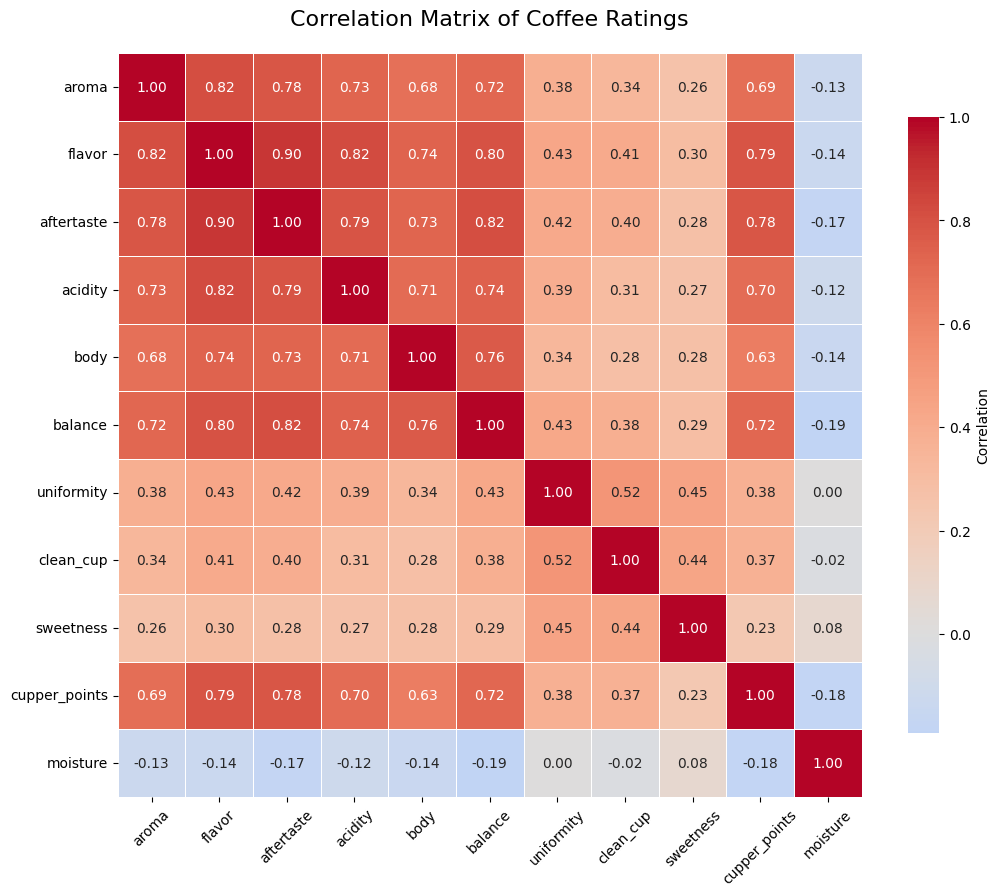

In [355]:
correlations = individual_scores.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(
    correlations, 
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'},
)

plt.title('Correlation Matrix of Coffee Ratings', fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

From the heatmap we can deduce that the strongest correlations are between the features that are related to the taste of the coffee, including *body*. The feature with the strongest overall correlation is *cupper_points*. The lowest correlation with any of the features is shown by *moisture*.

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!